In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [4]:
img = cv2.imread('./test_images/alia3.jpeg')
img.shape

(899, 1600, 3)

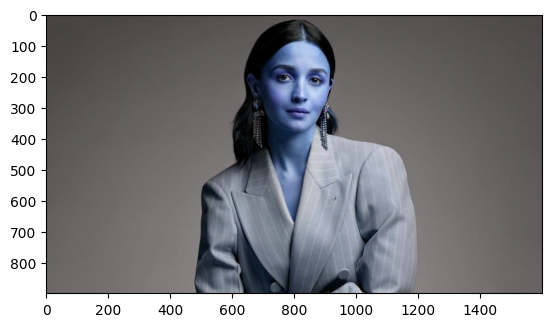

In [5]:
plt.imshow(img)

In [6]:
#converting image to gray color
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

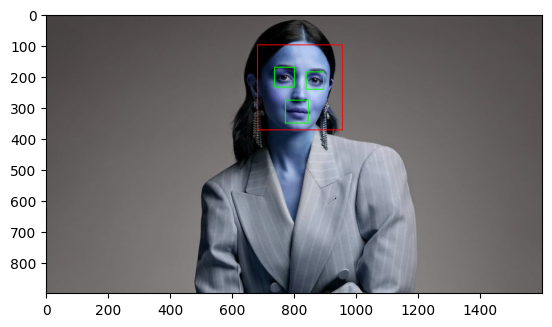

In [7]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

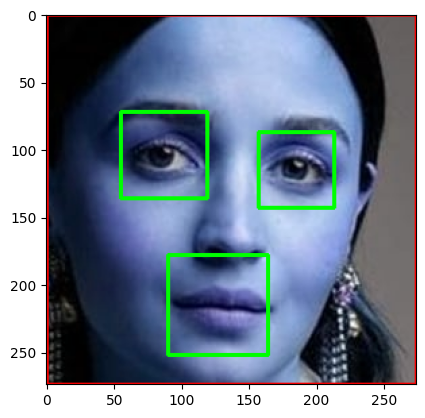

In [8]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [9]:
#check if the image has equal to or more than 2 eyes and crop those images into a cropped folder
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [10]:
original_image = cv2.imread('./test_images/alia3.jpeg')

In [11]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/alia3.jpeg')

In [12]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [15]:
#set image dataset directory
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./dataset/aish',
 './dataset/alia',
 './dataset/anushka',
 './dataset/deepika',
 './dataset/priyanka']

In [17]:
#create a cropped folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

#append cropped images in the cropped folder having more than 2 eyes
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        print(entry)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

aish
<DirEntry '1279778.jpeg'>
<DirEntry '1Aishwarya-Rai-will-stun-you-out-of-wits-with-this-wallpaper.jpeg'>
Generating cropped images in folder:  ./dataset/cropped/aish
<DirEntry '2014-Roberto-Cavalli-1.jpeg'>
<DirEntry '2103678.jpeg'>
<DirEntry '340062.jpeg'>
<DirEntry '48a81-aishwarya-rai-hot-hd-wallpapers1067x1600.jpeg'>
<DirEntry '4974222a1a2b4767359dbf7b3c6267dd--hd-photos-aishwarya-rai.jpeg'>
<DirEntry '4nNemO.jpeg'>
<DirEntry '514091-aishwarya-rai-aishwarya-sleeping-photo-celebrity.jpeg'>
<DirEntry '60501580.jpeg'>
<DirEntry '616121.jpeg'>
<DirEntry '61MZcNNVpzL.jpeg'>
<DirEntry '66162014.jpeg'>
<DirEntry '800px-Nmacc-2023-0331-Aishwarya_Rai.jpeg'>
<DirEntry '84037918.png'>
<DirEntry '91a78dcdc0323986cb3a82af89e4cbb9.jpeg'>
<DirEntry 'a04e604325240d69ec6082e474403336.jpeg'>
<DirEntry 'a8ff3d24-18d2-11eb-8f67-a484f6db61a1_image_hires_124711.jpeg'>
<DirEntry 'actress-aishwarya-rai-attends-a-photocall-for-jazbaa-during-the-68th-annual-cannes-film.jpeg'>
<DirEntry 'actress-aishwar

<DirEntry '5648362b29155.jpeg'>
<DirEntry '617784.jpeg'>
<DirEntry '6b0eebbf31274c7fb6df682aebe94819.jpeg'>
<DirEntry '750x450_450398-img-20221222-wa0006.jpeg'>
<DirEntry '7CB6D213-934F-43F4-AA0B-816FD31C3497.jpeg'>
<DirEntry '95013400.jpeg'>
<DirEntry 'ace3724b97b3cebc9dc5a3715fb40f34--desktop-wallpapers-hd-wallpaper.jpeg'>
<DirEntry 'amazing-anushka-sharma-smiling-face-hd-desktop-free-mobile-background-wallpaper.jpeg'>
<DirEntry 'anushka-sharma-10-1600x2400.jpeg'>
<DirEntry 'anushka-sharma-1440x2560-photo-bollywood-4k-15024.jpeg'>
<DirEntry 'anushka-sharma-2017-hd-wallpaper-preview.jpeg'>
<DirEntry 'anushka-sharma-3840x2160-photo-bollywood-4k-15024.jpeg'>
<DirEntry 'anushka-sharma-759.jpeg'>
<DirEntry 'anushka-sharma-beautiful-hd-photoshoot-stills-1080p-zgnosz1223801.jpeg'>
<DirEntry 'Anushka-sharma-blue-dress-clouse-up-hd-wallpaper.jpeg'>
<DirEntry 'anushka-sharma-bollywood-actress-indian-actress-2022-5k-8k-4480x2520-8336.jpeg'>
<DirEntry 'anushka-sharma-face-closeup-v0-ciuz3toxhdx9

<DirEntry 'priyanka-chopra-getty.jpeg'>
<DirEntry 'priyanka-chopra-gold-sequin-dress-london.jpeg'>
<DirEntry 'Priyanka-Chopra-Ive-Finally-Come-Terms-With-My-Natural-Skin.jpeg'>
<DirEntry 'priyanka-chopra-jonas-6453d3d0caace.jpg_crop=1.00xw_0.400xh;0,0.jpeg'>
<DirEntry 'priyanka-chopra-jonas-7-te-230414-2500x2040.jpeg'>
<DirEntry 'priyanka-chopra-jonas-attends-the-launch-of-her-limited-news-photo-1674231385.jpg_crop=0.462xw_0.308xh;0.242xw,0.jpeg'>
<DirEntry 'priyanka-chopra-jonas-attends-the-launch-of-her-limited-news-photo-1674231385.jpg_crop=1xw_0.jpeg'>
<DirEntry 'priyanka-chopra-jonas-gty-jef-220715_1657919861480_hpMain_4x5_608.jpeg'>
<DirEntry 'Priyanka-Chopra-Lead-51411e8b9ded419b8839afe25f36db72.jpeg'>
<DirEntry 'Priyanka-Chopra-Lead-5e1d60c63ef04a9a990dd81732fc1f66.jpeg'>
<DirEntry 'priyanka-chopra-love-again-premiere-denim-gown-lead-e51cf5a0e9124c0ba0c6f6ee8717bdc7.jpeg'>
<DirEntry 'Priyanka-Chopra-Offers-Rare-Glimpse-at-Life-as-a-Mother-Gushes-Over-Her-Marriage-to-Nick-Jonas-

### Manually examine cropped folder and delete any unwanted images


In [20]:
img_dirs
#create a dictionary that has all the image files in the cropped folder 
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'aish': ['./dataset/cropped/aish\\aish1.png',
  './dataset/cropped/aish\\aish10.png',
  './dataset/cropped/aish\\aish11.png',
  './dataset/cropped/aish\\aish12.png',
  './dataset/cropped/aish\\aish13.png',
  './dataset/cropped/aish\\aish14.png',
  './dataset/cropped/aish\\aish15.png',
  './dataset/cropped/aish\\aish16.png',
  './dataset/cropped/aish\\aish17.png',
  './dataset/cropped/aish\\aish18.png',
  './dataset/cropped/aish\\aish19.png',
  './dataset/cropped/aish\\aish2.png',
  './dataset/cropped/aish\\aish20.png',
  './dataset/cropped/aish\\aish21.png',
  './dataset/cropped/aish\\aish22.png',
  './dataset/cropped/aish\\aish23.png',
  './dataset/cropped/aish\\aish24.png',
  './dataset/cropped/aish\\aish25.png',
  './dataset/cropped/aish\\aish26.png',
  './dataset/cropped/aish\\aish27.png',
  './dataset/cropped/aish\\aish28.png',
  './dataset/cropped/aish\\aish29.png',
  './dataset/cropped/aish\\aish3.png',
  './dataset/cropped/aish\\aish30.png',
  './dataset/cropped/aish\\aish31.p

In [21]:
# specifically for creating dictionary to assign index to each celebrity to be used for y
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'aish': 0, 'alia': 1, 'anushka': 2, 'deepika': 3, 'priyanka': 4}

In [22]:
#wavelet transformation

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

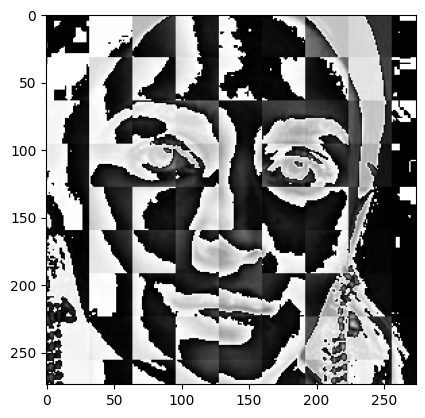

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [24]:
#Images in the cropped folder along with wavelet transformed images will be used for training the classifier

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        #read image using opencv
        img = cv2.imread(training_image)
        #resize the image 
        scalled_raw_img = cv2.resize(img, (32, 32))
        #create wavelet transformed image using w2d 
        img_har = w2d(img,'db1',5)
        #scale the image as per above size
        scalled_img_har = cv2.resize(img_har, (32, 32))
        #vertically stack both of these images to create a combined image file
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        #create x which is combined image
        X.append(combined_img)
        #create y as their dictionary index
        y.append(class_dict[celebrity_name])     

In [25]:
#size of each image
len(X[0]) 

4096

In [26]:
# size of raw image + size of transformed image
32*32*3 + 32*32

4096

In [27]:
X[0]

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [28]:
y[0]

0

In [29]:
#reshaped to make it float
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(262, 4096)

Training the model

In [30]:
#SVM with rbf kernel tuned  with heuristic finetuning

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
#scale the data using pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6363636363636364

In [32]:
#classification accuracy and precision and recall
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.95      0.72        19
           1       1.00      0.25      0.40         8
           2       0.56      0.60      0.58        15
           3       1.00      0.25      0.40        12
           4       0.71      0.83      0.77        12

    accuracy                           0.64        66
   macro avg       0.77      0.58      0.57        66
weighted avg       0.73      0.64      0.60        66



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
#all the models using gridsearch cv are tested with cross validation with 5 folds 
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
#dataframe is created for the models, their score and best parameters    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.606667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.407949,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.612308,{'logisticregression__C': 1}


In [36]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [37]:
best_estimators['svm'].score(X_test,y_test)

0.6363636363636364

In [38]:
best_estimators['random_forest'].score(X_test,y_test)

0.4393939393939394

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5909090909090909

In [40]:
best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[16,  1,  0,  1,  1],
       [ 2,  3,  2,  1,  0],
       [ 4,  0,  9,  0,  2],
       [ 2,  1,  4,  4,  1],
       [ 1,  0,  1,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

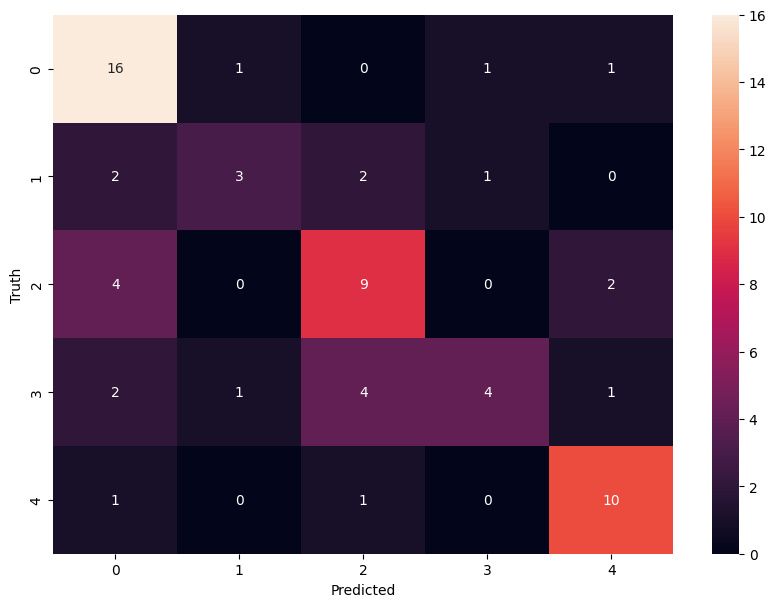

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
class_dict

{'aish': 0, 'alia': 1, 'anushka': 2, 'deepika': 3, 'priyanka': 4}

In [44]:
#save model
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [45]:
#save class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [46]:
class_dict


{'aish': 0, 'alia': 1, 'anushka': 2, 'deepika': 3, 'priyanka': 4}